# Blood Pressure Abnormality Prediction

# **Abstract:**

This project  is aimed at reducing blood pressure fatalities in Ghana especially the  rural areas where access to medical equipment is limited and they are not able to effectively monitor blood pressure levels. Growing up in Garu, a rural area in the upper East region of Ghana. I experienced firsthand what patients go through after it is detected late and they have to suffer the complications.This project aims to develop a classification model for  blood pressure abnormality prediction  by using data on alcohol consumption, smoking status, Gender and BMI.

# Importing Necessary Libraries

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop,SGD,Adagrad
from tensorflow.keras.callbacks import EarlyStopping



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,NuSVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import pickle




# The Dataset:

This dataset is a Blood Pressure data used to predict blood pressure abnormality in individuals. This data contains various features like Level of Haemoglobin, Genetic Pregancy, Smoking , Physical_activity and many crucial factors that contribute to high blood pressures that cause people to loose their lives if not detected early.


DATASET SOURCE: KAGGLE

Data can be found `https://www.kaggle.com/datasets/pavanbodanki/blood-press`



In [ ]:
#Loading the dataset
data=pd.read_csv("/content/data.csv")
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [ ]:
#checking for null values
data.shape

(2000, 15)

In [ ]:
data.isnull().sum()

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [ ]:
mean_preg=data['Pregnancy'].mean()
mean_alcohol=data['alcohol_consumption_per_day'].mean
data['Pregnancy'].fillna(mean_preg,inplace=True)
data['alcohol_consumption_per_day'].fillna(mean_alcohol,inplace=True)
data.isnull().sum()

<ipython-input-7-1016301154d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pregnancy'].fillna(mean_preg,inplace=True)
<ipython-input-7-1016301154d1>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0         NaN
1       205.0
2        67.0
3       242.0
4       397.0
        ...  
1995    144.0
1996      NaN
1997      NaN
1998    253.0
1999    230.0
Name: alcohol_consumption_per_day, Length: 2000, dtype: f

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,0
Smoking,0
Physical_activity,0


In [ ]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [ ]:
data["Blood_Pressure_Abnormality"].value_counts()

,count
Blood_Pressure_Abnormality,
0,1013
1,987


In [ ]:
data['alcohol_consumption_per_day'] = pd.to_numeric(data['alcohol_consumption_per_day'], errors='coerce')

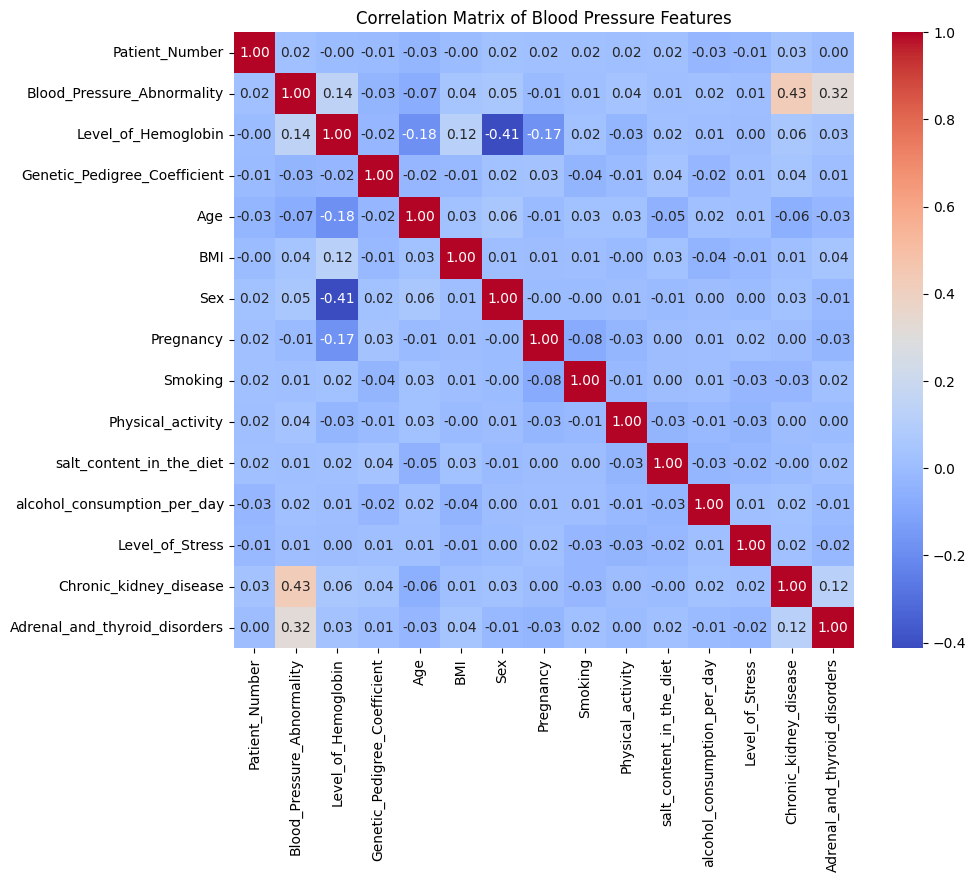

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Blood Pressure Features")
plt.savefig("correlation.png")
plt.show()


In [ ]:
X=data.drop(['Blood_Pressure_Abnormality','Patient_Number',],axis=1)
y=data['Blood_Pressure_Abnormality']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
nan_train = np.isnan(X_train).sum()
nan_test = np.isnan(X_test).sum()
print(nan_train)
print(nan_test)

Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient      59
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day      165
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64
Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient     17
Age                               0
BMI                               0
Sex                               0
Pregnancy                         0
Smoking                           0
Physical_activity                 0
salt_content_in_the_diet          0
alcohol_consumption_per_day      38
Level_of_Stress                   0
Chronic_kidney_disease            0
Adrenal_and_thyroid_disorders     0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
#normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#fuction for confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=None, cmap="Blues"):

    cm = confusion_matrix(y_true, y_pred)
    labels = labels if labels else np.unique(y_true)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
#function for plotting loss curve
def plot_loss_curve(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'],"bo", label='Training Loss')
    plt.plot(history.history['val_loss'],"r", label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

#MODEL ARCHITECTURE

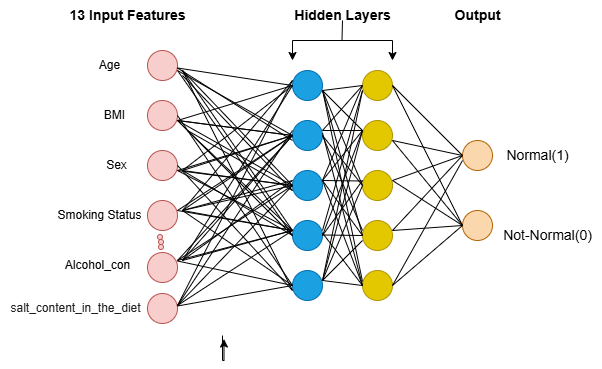

In [ ]:
epochs = 250
batch_size= 32
verbose= 1
validation_split= 0.2
learning_rate=0.0001
regularization_value=0.001


# FIRST MODEL




In [ ]:
def first_model():
  model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(1,activation='sigmoid'),

])
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy", "precision", "recall"])

  return model

#instance of model
model=first_model()
model.save("first_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    validation_split=validation_split,
)


Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5030 - loss: 0.7127 - precision: 0.5539 - recall: 0.3493 - val_accuracy: 0.5357 - val_loss: 0.7026 - val_precision: 0.5806 - val_recall: 0.3724
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4887 - loss: 0.7146 - precision: 0.5294 - recall: 0.3695 - val_accuracy: 0.5536 - val_loss: 0.6923 - val_precision: 0.5943 - val_recall: 0.4345
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4875 - loss: 0.7060 - precision: 0.5025 - recall: 0.4256 - val_accuracy: 0.5679 - val_loss: 0.6842 - val_precision: 0.6034 - val_recall: 0.4828
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5325 - loss: 0.6920 - precision: 0.5249 - recall: 0.4791 - val_accuracy: 0.5964 - val_loss: 0.6774 - val_precision: 0.6270 - val_recall: 0.5448
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5519 - loss: 0.6790 - precision: 0.5751 - recall: 0.4823 - val_accuracy: 0.6143 - val_loss: 0.6708

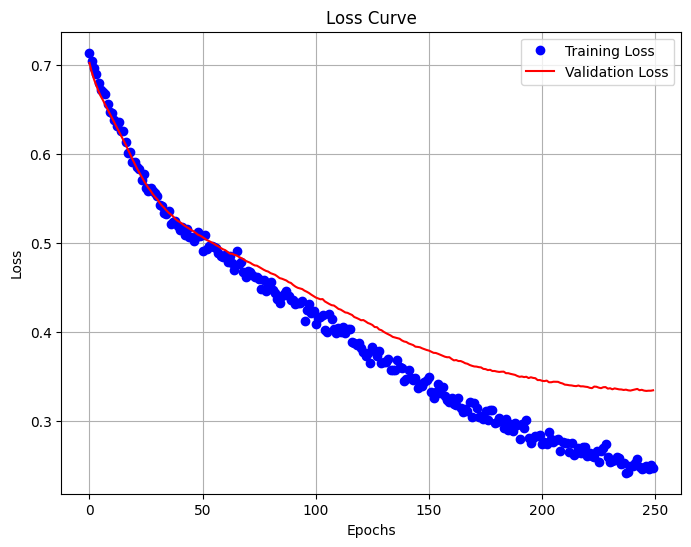

In [ ]:
plot_loss_curve(history)

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.4171
Test Accuracy: 0.8167
Test Precision: 0.8161473607038124
Test Recall: 0.8166666666666667
Test F1 Score: 0.8161759178047864


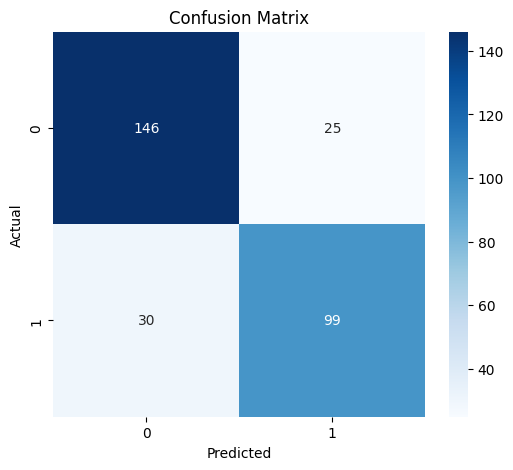

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       171
           1       0.80      0.77      0.78       129

    accuracy                           0.82       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# SECOND MODEL

In [ ]:

def second_model():
  model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(regularization_value)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid'),

])
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy", "precision", "recall"])
  return model

#instance of model
model=second_model()
model.save("second_model.h5")
early_stopping=callbacks.EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    callbacks= [early_stopping]
)


Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5126 - loss: 0.7468 - precision: 0.5122 - recall: 1.0000 - val_accuracy: 0.5286 - val_loss: 0.7030 - val_precision: 0.5235 - val_recall: 1.0000
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5339 - loss: 0.7132 - precision: 0.5241 - recall: 0.9707 - val_accuracy: 0.5821 - val_loss: 0.6854 - val_precision: 0.5609 - val_recall: 0.8897
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5975 - loss: 0.6786 - precision: 0.5680 - recall: 0.8992 - val_accuracy: 0.6393 - val_loss: 0.6786 - val_precision: 0.6170 - val_recall: 0.8000
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6255 - loss: 0.6765 - precision: 0.5915 - recall: 0.8210 - val_accuracy: 0.6750 - val_loss: 0.6735 - val_precision: 0.6667 - val_recall: 0.7448
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5807 - loss: 0.6784 - precision: 0.5728 - recall: 0.7072 - val_accuracy: 0.6821 - val_loss: 0.6669

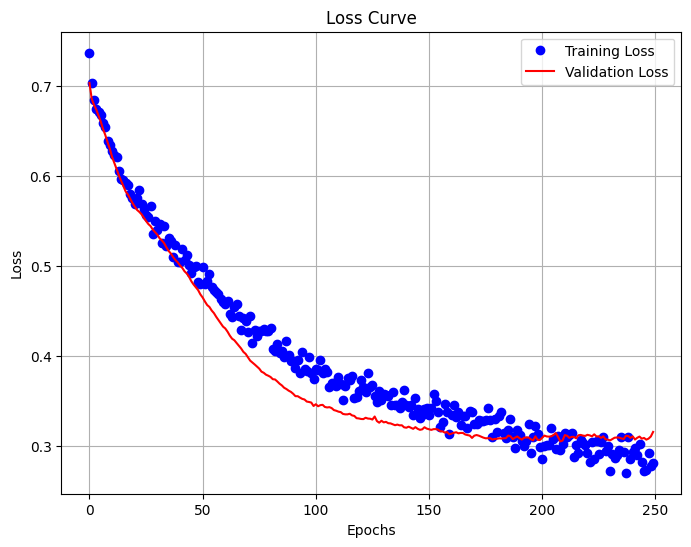

In [ ]:
plot_loss_curve(history)

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.3795
Test Accuracy: 0.8767
Test Precision: 0.8783070301291248
Test Recall: 0.8766666666666667
Test F1 Score: 0.8770070402703465


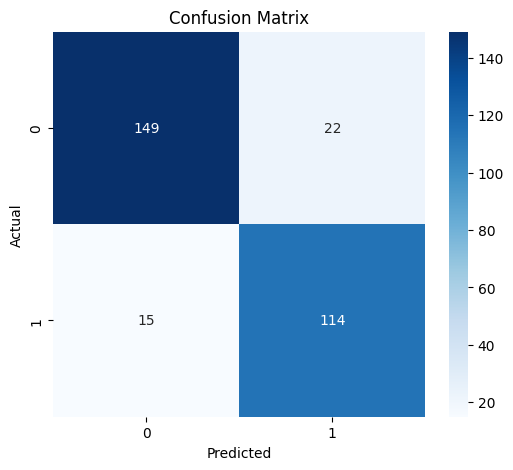

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       171
           1       0.84      0.88      0.86       129

    accuracy                           0.88       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.88      0.88       300



In [ ]:
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

## THIRD MODEL

In [ ]:
def third_model():
  model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(regularization_value)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid'),

])

  optimizer = RMSprop(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy","precision","recall"])

  return model

early_stopping=callbacks.EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

# Create the model instance
model = third_model()
model.save("third_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs= epochs,
    batch_size=batch_size,
    verbose=verbose,
    callbacks=[early_stopping]
)



Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4671 - loss: 0.9085 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4821 - val_loss: 0.8676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4809 - loss: 0.8779 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4821 - val_loss: 0.8532 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4866 - loss: 0.8596 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4821 - val_loss: 0.8426 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4981 - loss: 0.8386 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4821 - val_loss: 0.8339 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4931 - loss: 0.8306 - precision: 0

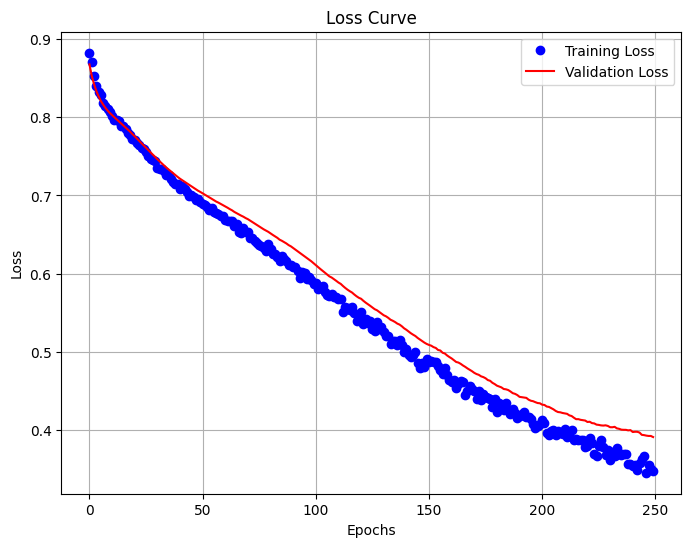

In [ ]:
plot_loss_curve(history)

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.4779
Test Accuracy: 0.8233
Test Precision: 0.8316554054054054
Test Recall: 0.8233333333333334
Test F1 Score: 0.8241962200042472


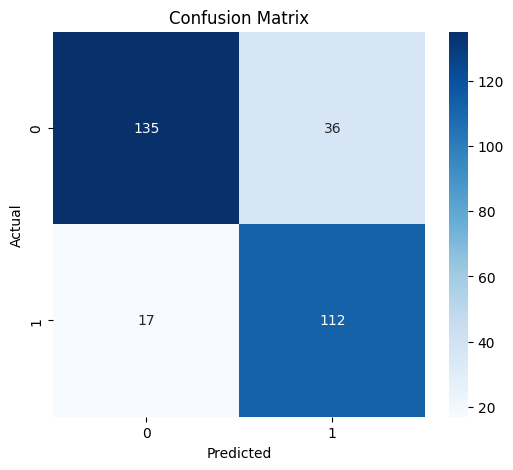

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       171
           1       0.76      0.87      0.81       129

    accuracy                           0.82       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.83      0.82      0.82       300



In [ ]:
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# FOURTH MODEL

In [ ]:
def fourth_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l1_l2(0.005)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(0.005)),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = AdamW(learning_rate=0.0005, weight_decay=1e-3)
    model.compile(optimizer=optimizer, loss="binary_crossentropy",
                  metrics=["accuracy", "precision", "recall"])

    return model

model = fourth_model()
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.save("fourth_model.h5")

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    callbacks=[early_stopping]
)


Epoch 1/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5179 - loss: 2.5292 - precision: 0.5531 - recall: 0.2273 - val_accuracy: 0.5786 - val_loss: 2.3823 - val_precision: 0.6421 - val_recall: 0.4207
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5859 - loss: 2.3466 - precision: 0.6236 - recall: 0.5509 - val_accuracy: 0.6500 - val_loss: 2.2192 - val_precision: 0.6822 - val_recall: 0.6069
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5875 - loss: 2.1962 - precision: 0.5979 - recall: 0.5227 - val_accuracy: 0.6893 - val_loss: 2.0657 - val_precision: 0.7101 - val_recall: 0.6759
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5916 - loss: 2.0434 - precision: 0.5966 - recall: 0.5436 - val_accuracy: 0.6929 - val_loss: 1.9182 - val_precision: 0.6832 - val_recall: 0.7586
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6163 - loss: 1.8955 - precision: 0.6148 - recall: 0.6542 - val_accuracy: 0.6964 - val_loss: 1.7762

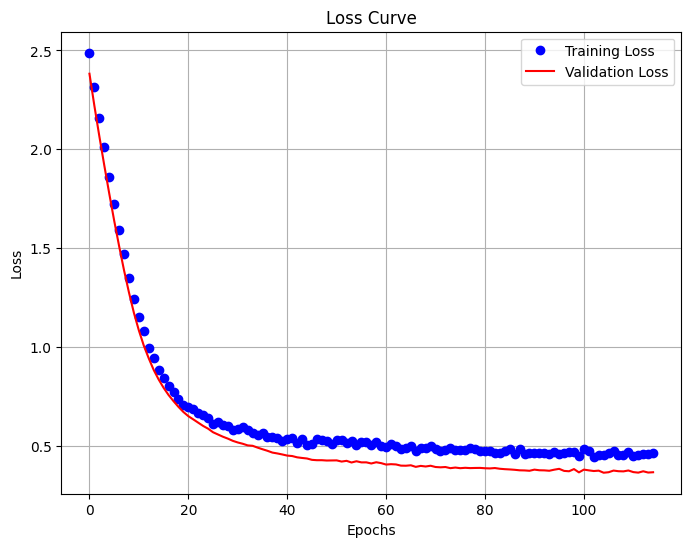

In [ ]:
plot_loss_curve(history)

In [ ]:
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.4342
Test Accuracy: 0.8733
Test Precision: 0.8740813110620862
Test Recall: 0.8733333333333333
Test F1 Score: 0.8735507475495731


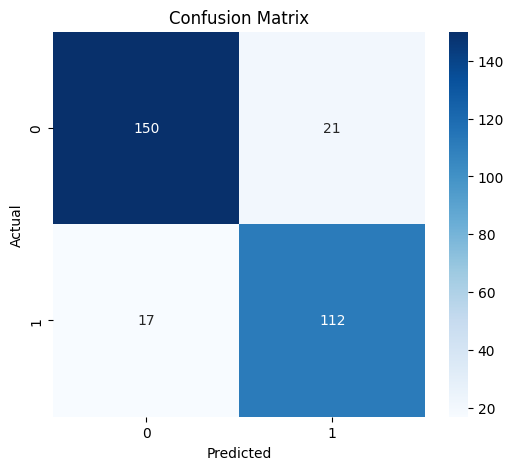

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       171
           1       0.84      0.87      0.85       129

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# MACHINE LEARNING ALGORITHM(LOGISTIC REGRESSION)

In [ ]:

def fifth_model():
    return LogisticRegression(C=0.5,
                              penalty='l2',
                              solver='lbfgs',
                              max_iter=100,
                              random_state=42)

logistic_model = fifth_model()
logistic_model.fit(X_train, y_train)

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)


In [ ]:
y_pred_prob = logistic_model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.4f}'.format(test_accuracy))
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f'Test F1 Score: {f1}')

Test Loss: 0.4342
Test Accuracy: 0.6967
Test Precision: 0.7018390087359602
Test Recall: 0.6966666666666667
Test F1 Score: 0.6979492816204758


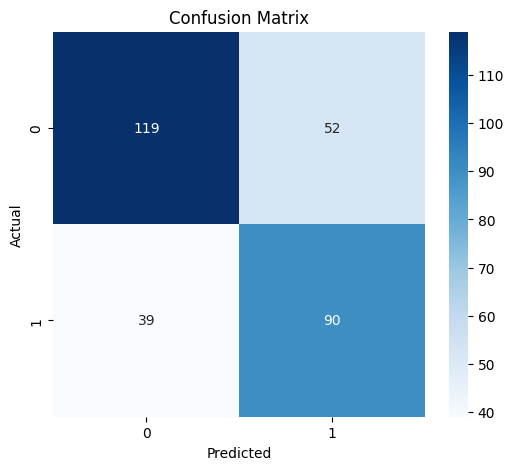

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       171
           1       0.63      0.70      0.66       129

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.70      0.70      0.70       300



In [ ]:
plot_confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)